# Spatial Data Analysis - Coding Grocery Store Data for West LA and South Central

This lab explores the Grocery Stores in West LA and South Central LA by focusing on the Council Districts that reside within either LA region. The data used for this notebook was accessed from the LA City open data portal website, and more information on this dataset can be accessed [here](https://data.lacity.org/Administration-Finance/Grocery-Stores/g986-7yf9). The data was filtered manually in Excel by focusing on Council Districts: 5, 8, 9, 10, 11. West LA is made up of CD 5 and 11 and South Central is made up of 8, 9, and 10, respectively. 

## Import the libraries

In [2]:
import osmnx as ox

import pandas as pd

import numpy as np

import plotly.express as px

import geopandas as gpd

import contextily as ctx

import matplotlib.pyplot as plt

/opt/conda/lib/python3.9/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


I must inport libraries to support my functions and commands throughout this notebook.

## Import data

In [3]:
grocery=pd.read_csv('filtereddataWSLA.csv')

Once the data is inported, it is helpful to use *.head()* to visualize what the data looks like. 

## Preliminary data analysis

In [4]:
grocery.head()

LOCATION ACCOUNT #                    BUSINESS NAME                DBA NAME  \
0  0000753274-0001-1                  REZVAN YAGHOUIL       WESTSIDE MARKET 2   
1  0000796051-0001-1           THE VONS COMPANIES INC  VONS #2100 | VONS 2100   
2  0003195194-0001-1               KOSHER EXPRESS LLC                     NaN   
3  0003265822-0001-0                     ZERO GROCERY                     NaN   
4  0002927758-0001-2  BOBS FOOD MARKET AND LIQUOR INC                     NaN   

                     STREET ADDRESS         CITY    ZIP CODE  \
0         998 S ROBERTSON BLVD #105  LOS ANGELES  90035-1626   
1                9860 NATIONAL BLVD  LOS ANGELES  90034-2713   
2  1606 S SHENANDOAH STREET   FRONT  LOS ANGELES  90035-4413   
3                 8942 ELLIS AVENUE  LOS ANGELES  90034-3302   
4             10000   NATIONAL BLVD  LOS ANGELES  90034-3809   

        LOCATION DESCRIPTION                   MAILING ADDRESS MAILING CITY  \
0   998 ROBERTSON 90035-1626                               NaN          NaN   
1   9860 NATIONAL 90034-2713            POST OFFICE BOX #29096      PHOENIX   
2      1606 SHENANDOAH 90035  1606 S SHENANDOAH STREET   FRONT  LOS ANGELES   
3      8942 Ellis 90034-3302                               NaN          NaN   
4  10000 NATIONAL 90034-3809                               NaN          NaN   

  MAILING ZIP CODE   NAICS                          PRIMARY NAICS DESCRIPTION  \
0              NaN  445100  Grocery stores (including supermarkets & conve...   
1       85038-9096  445100  Grocery stores (including supermarkets & conve...   
2       90035-4413  445100  Grocery stores (including supermarkets & conve...   
3              NaN  445100  Grocery stores (including supermarkets & conve...   
4              NaN  445100  Grocery stores (including supermarkets & conve...   

   COUNCIL DISTRICT LOCATION START DATE  LOCATION END DATE  \
0                 5              8/1/89                NaN   
1                 5              1/1/68                NaN   
2                 5             5/20/20                NaN   
3                 5              8/1/21                NaN   
4                 5              7/1/16                NaN   

               LOCATION  
0  (34.0594, -118.3836)  
1  (34.0307, -118.4019)  
2  (34.0498, -118.3819)  
3  (34.0294, -118.3902)  
4  (34.0288, -118.4033)

It is important to note several things here. There are additional columns that I do not need and there is not a **geometry** column.

In [5]:
type(grocery)

pandas.core.frame.DataFrame

In [6]:
list(grocery)

['LOCATION ACCOUNT #',
 'BUSINESS NAME',
 'DBA NAME',
 'STREET ADDRESS',
 'CITY',
 'ZIP CODE',
 'LOCATION DESCRIPTION',
 'MAILING ADDRESS',
 'MAILING CITY',
 'MAILING ZIP CODE',
 'NAICS',
 'PRIMARY NAICS DESCRIPTION',
 'COUNCIL DISTRICT',
 'LOCATION START DATE',
 'LOCATION END DATE',
 'LOCATION']

For the purposes of my goals with this dataset, not every column is necessary. I can use *columns_to_keep* in order to keep what I need, and drop what I do not.

In [7]:
columns_to_keep = [ 'DBA NAME',
 'STREET ADDRESS',
 'CITY',
 'ZIP CODE','COUNCIL DISTRICT',
 'LOCATION']
grocery = grocery[columns_to_keep]
grocery.sample(10)

DBA NAME                     STREET ADDRESS  \
86   EL MOLINO MEXICAN DELICATESSEN                  1573 W ADAMS BLVD   
496                   GUAPOS MARKET               744 S VERMONT AVENUE   
646             NORTGATE MARKET #41                4700 INGLEWOOD BLVD   
172                  G AND J MARKET  2045 W MARTIN LUTHER KING JR BLVD   
121                      ALOHA DELI              2406 S VERMONT AVENUE   
295                    DAMUS MARKET                5257 COMPTON AVENUE   
351            DISCOUNT MINI MARKET                    4117 S BROADWAY   
277               QUICKY'S MINIMART                984 W VERNON AVENUE   
14                         MUNCHIES                   8859 W PICO BLVD   
575                 TAYTU MINE MART        4379 W PICO BLVD   SUITE #1   

            CITY    ZIP CODE  COUNCIL DISTRICT              LOCATION  
86   LOS ANGELES  90007-1514                 8  (34.0327, -118.2964)  
496  LOS ANGELES  90005-1520                10  (34.0586, -118.2916)  
646  LOS ANGELES  90230-5896                11  (33.9932, -118.4153)  
172  LOS ANGELES  90062-1434                 8  (34.0108, -118.3164)  
121  LOS ANGELES  90007-1660                 8  (34.0341, -118.2915)  
295  LOS ANGELES  90011-4915                 9  (33.9952, -118.2477)  
351  LOS ANGELES  90037-2220                 9  (34.0084, -118.2783)  
277  LOS ANGELES  90037-3039                 9  (34.0036, -118.2911)  
14   LOS ANGELES  90035-3335                 5  (34.0553, -118.3851)  
575  LOS ANGELES  90019-3152                10  (34.0484, -118.3299)

Focusing on these 6 columns keeps the dataset simple. I can rename the columns by using *grocery.columns*.

In [8]:
grocery.columns = ['Grocery_Name','Street_Address','City','Zip_Code','Council_District','Location']
grocery

Grocery_Name                    Street_Address         City  \
0         WESTSIDE MARKET 2         998 S ROBERTSON BLVD #105  LOS ANGELES   
1    VONS #2100 | VONS 2100                9860 NATIONAL BLVD  LOS ANGELES   
2                       NaN  1606 S SHENANDOAH STREET   FRONT  LOS ANGELES   
3                       NaN                 8942 ELLIS AVENUE  LOS ANGELES   
4                       NaN             10000   NATIONAL BLVD  LOS ANGELES   
..                      ...                               ...          ...   
669      SMART & FINAL #315           12210 SANTA MONICA BLVD  LOS ANGELES   
670                     NaN          2402 S BARRINGTON AVENUE  LOS ANGELES   
671             VANS MARKET          12707   WASHINGTON PLACE  LOS ANGELES   
672            PLAZA OAXACA              3831 GRAND VIEW BLVD  LOS ANGELES   
673                     NaN               11614   VENICE BLVD  LOS ANGELES   

       Zip_Code  Council_District              Location  
0    90035-1626                 5  (34.0594, -118.3836)  
1    90034-2713                 5  (34.0307, -118.4019)  
2    90035-4413                 5  (34.0498, -118.3819)  
3    90034-3302                 5  (34.0294, -118.3902)  
4    90034-3809                 5  (34.0288, -118.4033)  
..          ...               ...                   ...  
669  90025-2518                11    (34.04, -118.4646)  
670  90064-2907                11  (34.0314, -118.4453)  
671  90066-4103                11   (33.9973, -118.435)  
672  90066-4405                11  (34.0039, -118.4309)  
673  90066-4014                11  (34.0085, -118.4241)  

[674 rows x 6 columns]

In order to avoid any issues with plotting down the line, it is important to drop any input that does not have coordinates, or has the coordinates (0.0,0.0). I can do this by using *grocery.dropna()* to catch all inputs that are zip.

## Dropping null inputs

In [9]:
groceryDrop = grocery.dropna()
groceryDrop.head()

Grocery_Name                    Street_Address         City  \
0           WESTSIDE MARKET 2         998 S ROBERTSON BLVD #105  LOS ANGELES   
1      VONS #2100 | VONS 2100                9860 NATIONAL BLVD  LOS ANGELES   
5   MICKEY FINE AT WATT PLAZA  1875   CENTURY PARKS  E SUITE #E  LOS ANGELES   
6     FRANKS LIQUOR & MARKIET           10559 SANTA MONICA BLVD  LOS ANGELES   
7  BAHAY NATIN SEAFOOD MARKET                9903   VENICE BLVD  LOS ANGELES   

     Zip_Code  Council_District              Location  
0  90035-1626                 5  (34.0594, -118.3836)  
1  90034-2713                 5  (34.0307, -118.4019)  
5  90067-2337                 5   (34.061, -118.4149)  
6  90025-4907                 5  (34.0547, -118.4283)  
7  90034-5111                 5  (34.0235, -118.3992)

Let's check how many rows we have dropped that had null inputs...

In [10]:
groceryDrop.shape

(557, 6)

In [11]:
grocery.shape

(674, 6)

I continue to ensure that all null inputs are dropped by using  the *"not equal" notation (!=)* by dropping any coordinates equal to *(0.0, 0.0)*.


In [12]:
groceryDrop[groceryDrop['Location'] == '(0.0, 0.0)']

Grocery_Name                  Street_Address  \
12              7-ELEVEN STORE 16114C         10834 SANTA MONICA BLVD   
76               FIGUEROA MINI MARKET          8631 S FIGUEROA STREET   
193               TNN DISCOUNT MARKET          9333 S FIGUEROA STREET   
239                     BUBBAS MARKET           4700 S VERMONT AVENUE   
241  ROSA'S MARKET & ENVIOS DE DINERO            4114 S HOOVER STREET   
247                     JONNYS MARKET         2910 S SAN PEDRO STREET   
312                        B J MARKET         9404 S SAN PEDRO STREET   
431                 NUMERO UNO MARKET           701 E JERFFERSON BLVD   
523             7-ELEVEN STORE 37727H                2580 VENICE BLVD   
539                 CALIFORNIA MARKET  450 S WESTERN AVENUE UNIT #201   
600                SMART & FINAL #470              2929 CRENSHAW BLVD   
614             7-ELEVEN STORE 37723B      2030 W 8TH STREET SUITE #A   
622             SUNNY LIQUOR & MARKET               12815 VENICE BLVD   
628             7-ELEVEN STORE 41355H           9210 S SEPULVEDA BLVD   
631                           EREWHON                    585   VENICE   
640              TARA AND JB'S MARKET  12131 WASHINGTON PLACE UNIT #E   
664                     911 FOOD MART               11909 W PICO BLVD   

            City    Zip_Code  Council_District    Location  
12   LOS ANGELES  90025-4617                 5  (0.0, 0.0)  
76   LOS ANGELES      90003-                 8  (0.0, 0.0)  
193  LOS ANGELES  90003-3922                 8  (0.0, 0.0)  
239  LOS ANGELES  90037-2928                 9  (0.0, 0.0)  
241  LOS ANGELES      90037-                 9  (0.0, 0.0)  
247  LOS ANGELES      90011-                 9  (0.0, 0.0)  
312  LOS ANGELES  90003-4321                 9  (0.0, 0.0)  
431  LOS ANGELES      90011-                 9  (0.0, 0.0)  
523  LOS ANGELES  90019-5251                10  (0.0, 0.0)  
539  LOS ANGELES  90020-4199                10  (0.0, 0.0)  
600  LOS ANGELES  90016-4266                10  (0.0, 0.0)  
614  LOS ANGELES  90057-4016                10  (0.0, 0.0)  
622  LOS ANGELES  90066-3507                11  (0.0, 0.0)  
628  LOS ANGELES  90045-4805                11  (0.0, 0.0)  
631  LOS ANGELES  90291-0000                11  (0.0, 0.0)  
640  LOS ANGELES  90066-5272                11  (0.0, 0.0)  
664  LOS ANGELES  90064-1312                11  (0.0, 0.0)

## Creating a geometry column to plot

Since my data was a CSV and did not have the necessary formatting for plotting directly from this data, I must build my own geometry column in order to begin plotting maps.

In [13]:
lat = []
lon = []
for row in groceryDrop['Location']: 
    try: 
        lat.append(row.split(',')[0]) 
        lon.append(row.split(',')[1])
    except:
        lat.append(np.NaN)
        lon.append(np.NaN)

Here, I am pulling the coordinates from the 'Location' column in my dataset, splitting the latitude and longitude, and dropping any null values.

In [14]:
groceryDrop['latitude'] = lat
groceryDrop['longitude'] = lon

/tmp/ipykernel_886/334160719.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  groceryDrop['latitude'] = lat
/tmp/ipykernel_886/334160719.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  groceryDrop['longitude'] = lon


Now, I have split the coordinates from the dataset 'Location' column. Let's see what this looks like!

In [15]:
groceryDrop.dropna(axis='columns')

Grocery_Name                    Street_Address  \
0             WESTSIDE MARKET 2         998 S ROBERTSON BLVD #105   
1        VONS #2100 | VONS 2100                9860 NATIONAL BLVD   
5     MICKEY FINE AT WATT PLAZA  1875   CENTURY PARKS  E SUITE #E   
6       FRANKS LIQUOR & MARKIET           10559 SANTA MONICA BLVD   
7    BAHAY NATIN SEAFOOD MARKET                9903   VENICE BLVD   
..                          ...                               ...   
664               911 FOOD MART                 11909 W PICO BLVD   
667     RALPH'S GROCERY CO #278                 8701 LINCOLN BLVD   
669          SMART & FINAL #315           12210 SANTA MONICA BLVD   
671                 VANS MARKET          12707   WASHINGTON PLACE   
672                PLAZA OAXACA              3831 GRAND VIEW BLVD   

            City    Zip_Code  Council_District              Location  \
0    LOS ANGELES  90035-1626                 5  (34.0594, -118.3836)   
1    LOS ANGELES  90034-2713                 5  (34.0307, -118.4019)   
5    LOS ANGELES  90067-2337                 5   (34.061, -118.4149)   
6    LOS ANGELES  90025-4907                 5  (34.0547, -118.4283)   
7    LOS ANGELES  90034-5111                 5  (34.0235, -118.3992)   
..           ...         ...               ...                   ...   
664  LOS ANGELES  90064-1312                11            (0.0, 0.0)   
667  LOS ANGELES  90045-3504                11  (33.9588, -118.4183)   
669  LOS ANGELES  90025-2518                11    (34.04, -118.4646)   
671  LOS ANGELES  90066-4103                11   (33.9973, -118.435)   
672  LOS ANGELES  90066-4405                11  (34.0039, -118.4309)   

     latitude    longitude  
0    (34.0594   -118.3836)  
1    (34.0307   -118.4019)  
5     (34.061   -118.4149)  
6    (34.0547   -118.4283)  
7    (34.0235   -118.3992)  
..        ...          ...  
664      (0.0         0.0)  
667  (33.9588   -118.4183)  
669    (34.04   -118.4646)  
671  (33.9973    -118.435)  
672  (34.0039   -118.4309)  

[557 rows x 8 columns]

Notice the separate lat and lon columns (now we have 8 columns). But uh-oh, another sneaky 0.0 coordinate is in the dataset. I use *.dropna(axis='columns')* in order to drop any remainder null inputs.

### Dropping the parenthesis in the lat and lon column coordinates

In [16]:
groceryDrop['latitude']= groceryDrop['latitude'].str.replace("(","")

/tmp/ipykernel_886/3596628341.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  groceryDrop['latitude']= groceryDrop['latitude'].str.replace("(","")
/tmp/ipykernel_886/3596628341.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  groceryDrop['latitude']= groceryDrop['latitude'].str.replace("(","")


In [17]:
groceryDrop['longitude']= groceryDrop['longitude'].str.replace(")","")

/tmp/ipykernel_886/1490813553.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  groceryDrop['longitude']= groceryDrop['longitude'].str.replace(")","")
/tmp/ipykernel_886/1490813553.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  groceryDrop['longitude']= groceryDrop['longitude'].str.replace(")","")


It's essential to drop the parentheses if I want to create a geometry column down the line. I can drop the parenthesis by using *.str.replace(")","")*.

### Transforming a string to a float

In [18]:
latitude = (groceryDrop.latitude).apply(lambda x: float(x))
latitude

0      34.0594
1      34.0307
5      34.0610
6      34.0547
7      34.0235
        ...   
664     0.0000
667    33.9588
669    34.0400
671    33.9973
672    34.0039
Name: latitude, Length: 557, dtype: float64

In [19]:
longitude = (groceryDrop.longitude).apply(lambda x: float(x))
longitude

0     -118.3836
1     -118.4019
5     -118.4149
6     -118.4283
7     -118.3992
         ...   
664      0.0000
667   -118.4183
669   -118.4646
671   -118.4350
672   -118.4309
Name: longitude, Length: 557, dtype: float64

For both the latitude and longitude columns, it is necessary to change the type of data to a float in order for it to be accessible in creating a geometry column to plot the data.

In [20]:
groceryDrop.dtypes

Grocery_Name        object
Street_Address      object
City                object
Zip_Code            object
Council_District     int64
Location            object
latitude            object
longitude           object
dtype: object

I can confirm that the type of data has been changed.

In [21]:
groceryFinal = groceryDrop[groceryDrop['latitude'] !=0.000]

I can finalize the name of the dataset and equal this to another *"not equal" notation (!=)* to drop more unneccessary inputs.

In [22]:
latitude

0      34.0594
1      34.0307
5      34.0610
6      34.0547
7      34.0235
        ...   
664     0.0000
667    33.9588
669    34.0400
671    33.9973
672    34.0039
Name: latitude, Length: 557, dtype: float64

Yay! Our latitude column is now a float type.

## Plottable dataset

In [23]:
groceryDrop.to_csv("groceryDrop.csv",index=False)

In [24]:
groceryFinal = pd.read_csv('groceryDrop.csv')
print(groceryFinal)

                   Grocery_Name                    Street_Address  \
0             WESTSIDE MARKET 2         998 S ROBERTSON BLVD #105   
1        VONS #2100 | VONS 2100                9860 NATIONAL BLVD   
2     MICKEY FINE AT WATT PLAZA  1875   CENTURY PARKS  E SUITE #E   
3       FRANKS LIQUOR & MARKIET           10559 SANTA MONICA BLVD   
4    BAHAY NATIN SEAFOOD MARKET                9903   VENICE BLVD   
..                          ...                               ...   
552               911 FOOD MART                 11909 W PICO BLVD   
553     RALPH'S GROCERY CO #278                 8701 LINCOLN BLVD   
554          SMART & FINAL #315           12210 SANTA MONICA BLVD   
555                 VANS MARKET          12707   WASHINGTON PLACE   
556                PLAZA OAXACA              3831 GRAND VIEW BLVD   

            City    Zip_Code  Council_District              Location  \
0    LOS ANGELES  90035-1626                 5  (34.0594, -118.3836)   
1    LOS ANGELES  90034-271

How nice does this dataset look now that it is all together? The separted and cleaned up lat and lon columns are going to be essential to our plotting.

In [25]:
groceryDrop = groceryDrop[groceryDrop.latitude != '0.0']

I can finalize the name of the dataset and equal this to another *"not equal" notation (!=)* to drop more unneccessary inputs.

In [26]:
print(groceryDrop)

                   Grocery_Name                    Street_Address  \
0             WESTSIDE MARKET 2         998 S ROBERTSON BLVD #105   
1        VONS #2100 | VONS 2100                9860 NATIONAL BLVD   
5     MICKEY FINE AT WATT PLAZA  1875   CENTURY PARKS  E SUITE #E   
6       FRANKS LIQUOR & MARKIET           10559 SANTA MONICA BLVD   
7    BAHAY NATIN SEAFOOD MARKET                9903   VENICE BLVD   
..                          ...                               ...   
663               NIJIYA MARKET           2130 SAWTELLE BLVD #105   
667     RALPH'S GROCERY CO #278                 8701 LINCOLN BLVD   
669          SMART & FINAL #315           12210 SANTA MONICA BLVD   
671                 VANS MARKET          12707   WASHINGTON PLACE   
672                PLAZA OAXACA              3831 GRAND VIEW BLVD   

            City    Zip_Code  Council_District              Location latitude  \
0    LOS ANGELES  90035-1626                 5  (34.0594, -118.3836)  34.0594   
1    LOS 

As we dropped more 0.0 null coordinates, notice how our number of rows decreased from 557 to 540.

## Creating the graphics

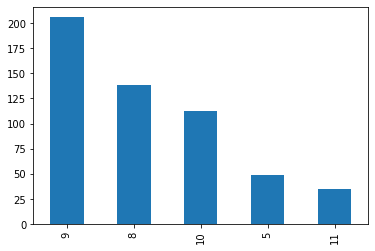

In [27]:
groceryDrop['Council_District'].value_counts().plot(kind='bar');

This bar graph shows the number of grocery stores by Council District (CD). Remember that CD 8, 9, and 10 are within the South Central Region while CD 5 and 11 are within the West LA Region.

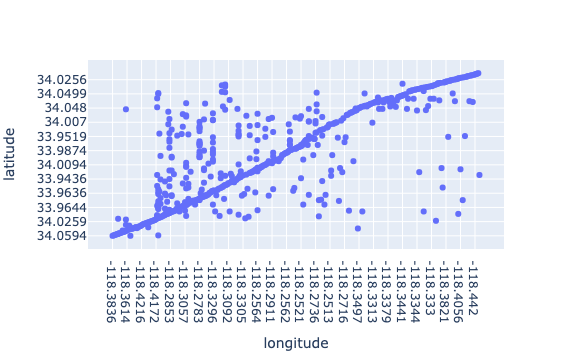

In [28]:
px.scatter(groceryDrop,
           x='longitude',
           y='latitude'
          )

This scatterplot of the dataset portrays a scatterplot of the lat and lon of each reported grocery store within CD 5, 8, 9, 10, and 11.

## Let's make maps!

In [29]:
gdf=gpd.GeoDataFrame(groceryDrop, 
                       crs='epsg:4326',
                       geometry=gpd.points_from_xy(groceryDrop.longitude, groceryDrop.latitude))

gdf is a geo data frame I create in order to *finally* create my geometry column which will support me in plotting some maps.

In [30]:
gdf_web_mercator = gdf.to_crs(epsg=3857)

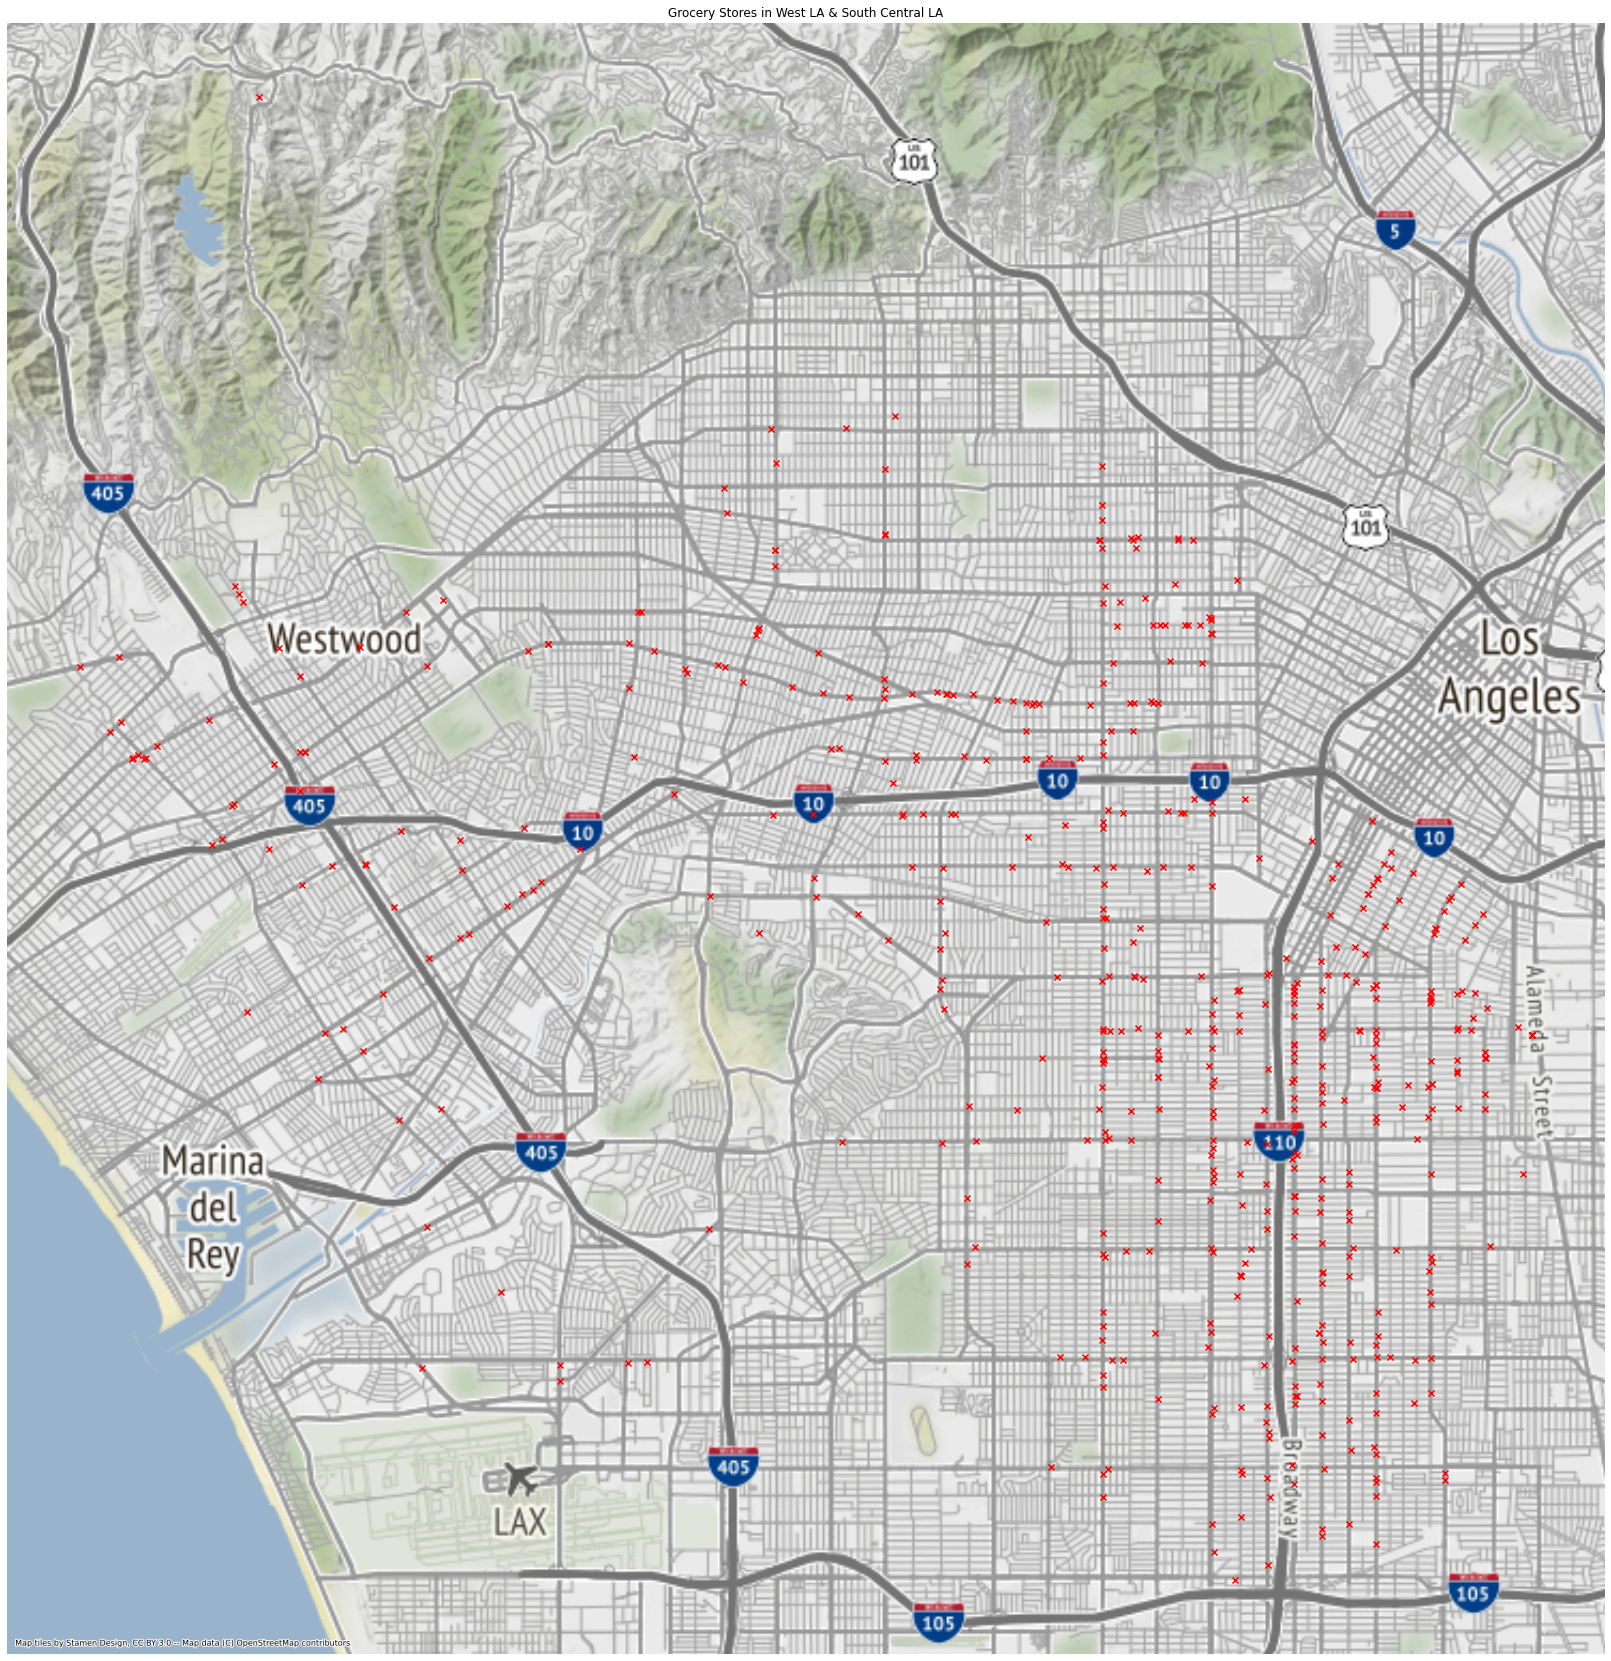

In [31]:
fig, ax = plt.subplots(figsize=(30,30))

gdf_web_mercator.plot(ax=ax, marker='x', color='red')

ax.axis('off')

ax.set_title('Grocery Stores in West LA & South Central LA')

ctx.add_basemap(ax)

I will say this map portrays the availability of grocery stores very well in South Central compared to West LA. This is not what I hypothesized in my initial research question. I plan to somehow map by Council District but I also would like to pull some names of the grocery stores to compare that within Council Districts to show that the access to the type of grocery is also important (corporate chain or small business/ family owned). For now, this will have to support that narrative.

### A folium map

In [32]:
import folium

In [33]:
m = folium.Map()
m

I add a function and a loop here for each row of latitude and longitude to make for easier plotting.

In [34]:
for index, row in gdf.iterrows():
    print(row.latitude, row.longitude)

34.0594  -118.3836
34.0307  -118.4019
34.061  -118.4149
34.0547  -118.4283
34.0235  -118.3992
34.0676  -118.3617
34.0725  -118.3693
34.0617  -118.4477
34.0251  -118.4119
34.0553  -118.3851
34.0546  -118.4412
34.0551  -118.3981
34.0697  -118.344
34.0493  -118.3851
34.0792  -118.3614
34.0166  -118.4107
34.0291  -118.4122
34.0594  -118.4208
34.0202  -118.4046
34.0628  -118.4483
34.0542  -118.4013
34.0837  -118.3623
34.0407  -118.437
34.0542  -118.381
34.0257  -118.4273
34.0278  -118.393
34.1278  -118.4445
34.016  -118.4122
34.0302  -118.4216
34.0696  -118.344
34.0201  -118.4228
34.0356  -118.4378
34.0854  -118.3424
34.0219  -118.4023
34.0758  -118.3698
34.0508  -118.4379
34.0838  -118.3502
34.0259  -118.4274
34.0593  -118.3831
34.0607  -118.447
34.0551  -118.3981
34.0522  -118.4175
34.0407  -118.437
34.0407  -118.4379
34.0224  -118.4004
34.0784  -118.344
34.0134  -118.4172
34.0655  -118.3617
34.0676  -118.3617
33.9416  -118.309
33.9768  -118.3089
33.9547  -118.3002
33.9544  -118.2738
33.9

This index is essential to adding to ensure the folium map can be plotted.

In [36]:
m = folium.Map(location=[34.050253921905316, -118.29062251089758], width=750, height=500)
for index, row in gdf.iterrows():
    # add folium marker code
    folium.Marker([row.latitude, row.longitude]).add_to(m)
    #second layer to add to map
f2=folium.FeatureGroup(name='Name of Layer').add_to(m)

#markers
for index, row in gdf.iterrows():
    folium.Circle([row.latitude, row.longitude], popup=row.Grocery_Name, tooltip=row.Grocery_Name).add_to(f2)
m

In [37]:
m.save('WSCgrocery_stores.html')

The folium map gives more details in my grocery store map portraying CD 5, 8, 9, 10, and 11 to show West LA and South Central.